In [10]:
import os
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn import metrics
import matplotlib.pyplot as plt

os.system('mkdir -p ./res ./cache ./figures')
ROOT = '.'

In [6]:
df_names = ["enzymes", "reactions"]
dfs = {}
for name in df_names:
    dfs[name] = pd.read_csv(f"{ROOT}/res/df_{name}_tax_all.csv", index_col=0)
    print(name, dfs[name].shape)

/tmp/ipykernel_3118/3524535356.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(f"{ROOT}/df_{name}_tax_all.csv", index_col=0)


enzymes (3401, 5399)


/tmp/ipykernel_3118/3524535356.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(f"{ROOT}/df_{name}_tax_all.csv", index_col=0)


reactions (3401, 4019)


In [9]:
# get featues (reactions / enzymes)
ll = 4019
fil = [False for _ in range(11)] + [True for _ in range(3835)] + [False for _ in range(5)] + [True for _ in range(1000)]
fil = fil[:ll]
dfr = df_data = dfs['reactions'].iloc[:, fil]
print('reactions', dfr.shape)

dfe = dfs['enzymes'].loc[:, ["ENZ" in col for col in dfs['enzymes'].columns]]
print('enzymes', dfr.shape)

reactions (3401, 4003)
enzymes (3401, 4003)


In [13]:
def get_distance_matrix(df_data, name):
    save_path = f'{ROOT}/cache/{name}.dm.npy'
    if os.path.isfile(save_path):
        print(f'loading dm from {save_path}')
        dist_matrix = np.load(save_path, allow_pickle=True)
    else:
        print(f'calculating dm for {name}')
        dist_matrix = metrics.pairwise_distances(
            df_data.to_numpy(dtype=bool),
            metric='jaccard',
            n_jobs=8)
        np.save(save_path, dist_matrix)
    return dist_matrix

dmr = get_distance_matrix(dfr, 'reactions')
dme = get_distance_matrix(dfe, 'enzymes')

loading dm from ./cache/reactions.dm.npy
loading dm from ./cache/enzymes.dm.npy


per=15
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 3401 samples in 0.032s...


/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computed neighbors for 3401 samples in 0.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3401
[t-SNE] Computed conditional probabilities for sample 2000 / 3401
[t-SNE] Computed conditional probabilities for sample 3000 / 3401
[t-SNE] Computed conditional probabilities for sample 3401 / 3401
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.814651
[t-SNE] KL divergence after 1000 iterations: 1.385868


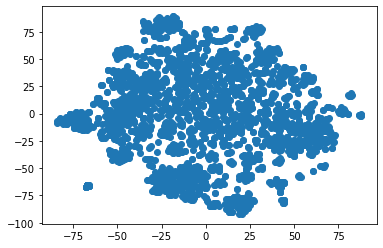

per=30
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3401 samples in 0.035s...


/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computed neighbors for 3401 samples in 0.498s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3401
[t-SNE] Computed conditional probabilities for sample 2000 / 3401
[t-SNE] Computed conditional probabilities for sample 3000 / 3401
[t-SNE] Computed conditional probabilities for sample 3401 / 3401
[t-SNE] Mean sigma: 0.200974
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.611900
[t-SNE] KL divergence after 1000 iterations: 1.424395


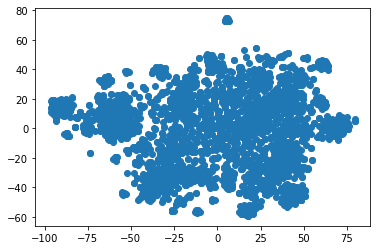

per=60
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 3401 samples in 0.033s...


/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computed neighbors for 3401 samples in 0.537s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3401
[t-SNE] Computed conditional probabilities for sample 2000 / 3401
[t-SNE] Computed conditional probabilities for sample 3000 / 3401
[t-SNE] Computed conditional probabilities for sample 3401 / 3401
[t-SNE] Mean sigma: 0.211512
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.975380
[t-SNE] KL divergence after 1000 iterations: 1.387061


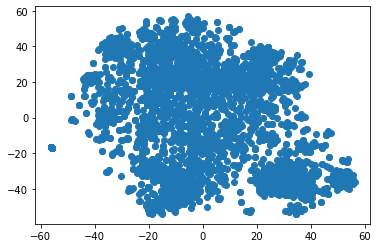

per=15
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 3401 samples in 0.027s...


/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computed neighbors for 3401 samples in 0.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3401
[t-SNE] Computed conditional probabilities for sample 2000 / 3401
[t-SNE] Computed conditional probabilities for sample 3000 / 3401
[t-SNE] Computed conditional probabilities for sample 3401 / 3401
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.824532
[t-SNE] KL divergence after 1000 iterations: 1.390075


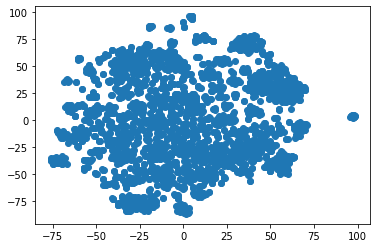

per=30
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3401 samples in 0.041s...


/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computed neighbors for 3401 samples in 0.467s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3401
[t-SNE] Computed conditional probabilities for sample 2000 / 3401
[t-SNE] Computed conditional probabilities for sample 3000 / 3401
[t-SNE] Computed conditional probabilities for sample 3401 / 3401
[t-SNE] Mean sigma: 0.199971
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.651169
[t-SNE] KL divergence after 1000 iterations: 1.434393


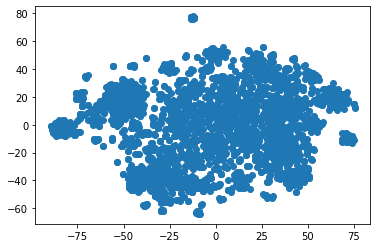

per=60
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 3401 samples in 0.028s...


/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computed neighbors for 3401 samples in 0.518s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3401
[t-SNE] Computed conditional probabilities for sample 2000 / 3401
[t-SNE] Computed conditional probabilities for sample 3000 / 3401
[t-SNE] Computed conditional probabilities for sample 3401 / 3401
[t-SNE] Mean sigma: 0.210184
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.057411
[t-SNE] KL divergence after 1000 iterations: 1.381477


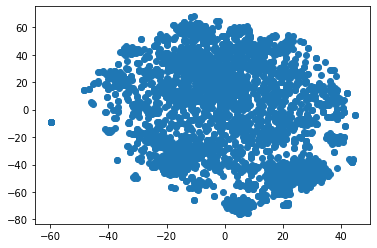

In [14]:
# hyperparameter experiments
# usually, the default of 30 perplexity and 1000 iters works fine

def test_hypers(dist_matrix):
    results = []
    for p in [15, 30, 60]:
        print(f"per={p}")
        model = TSNE(n_components=2, init='random', verbose=1, perplexity=p, metric='precomputed')
        tsne_results = model.fit_transform(dist_matrix)
        results.append(tsne_results)
        fig, ax = plt.subplots()
        x, y = [i[0] for i in tsne_results], [i[1] for i in tsne_results]
        ax.scatter(x, y)
        plt.show()

test_hypers(dmr)
test_hypers(dme)

In [15]:
def get_tsne_results(dist_matrix, name):
    # p = 30, iter = 1000, defaults
    save_path = f'{ROOT}/cache/{name}.tnse.npy'
    if os.path.isfile(save_path):
        print(f'loading tsne results from {save_path}')
        tsne_results = np.load(save_path)
    else:
        model = TSNE(n_components=2, init='random', verbose=1, metric='precomputed')
        tsne_results = model.fit_transform(dist_matrix)
        np.save(save_path, tsne_results)
    return tsne_results

tsr = get_tsne_results(dmr, 'reactions')
tse = get_tsne_results(dme, 'enzymes')

/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3401 samples in 0.032s...
[t-SNE] Computed neighbors for 3401 samples in 0.491s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3401
[t-SNE] Computed conditional probabilities for sample 2000 / 3401
[t-SNE] Computed conditional probabilities for sample 3000 / 3401
[t-SNE] Computed conditional probabilities for sample 3401 / 3401
[t-SNE] Mean sigma: 0.200974
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.613541
[t-SNE] KL divergence after 1000 iterations: 1.435128


/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tliu/lib/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3401 samples in 0.027s...
[t-SNE] Computed neighbors for 3401 samples in 0.455s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3401
[t-SNE] Computed conditional probabilities for sample 2000 / 3401
[t-SNE] Computed conditional probabilities for sample 3000 / 3401
[t-SNE] Computed conditional probabilities for sample 3401 / 3401
[t-SNE] Mean sigma: 0.199971
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.652641
[t-SNE] KL divergence after 1000 iterations: 1.410063


reactions


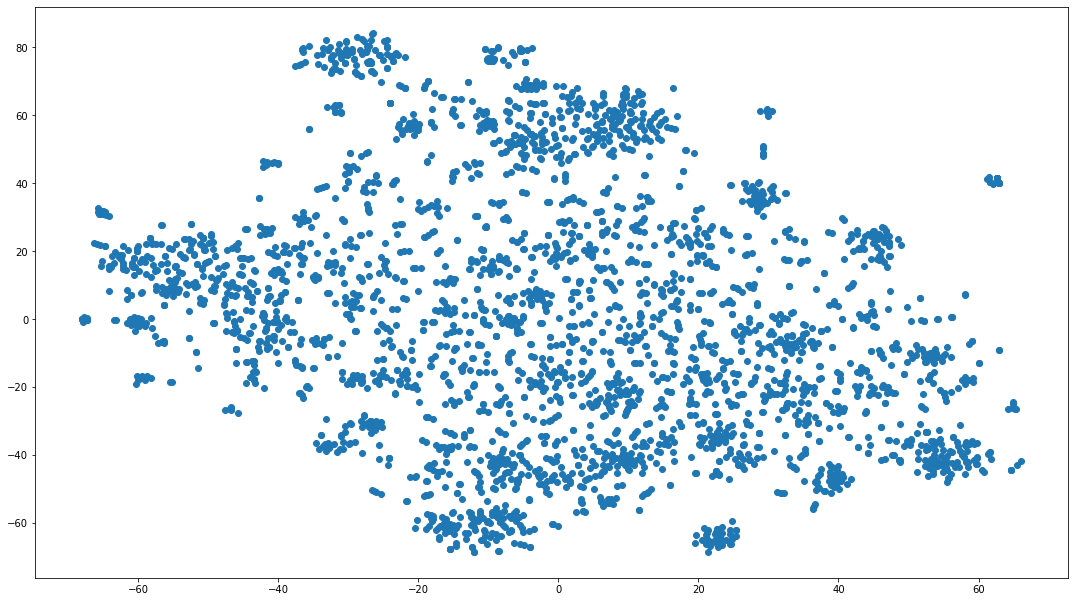

enzymes


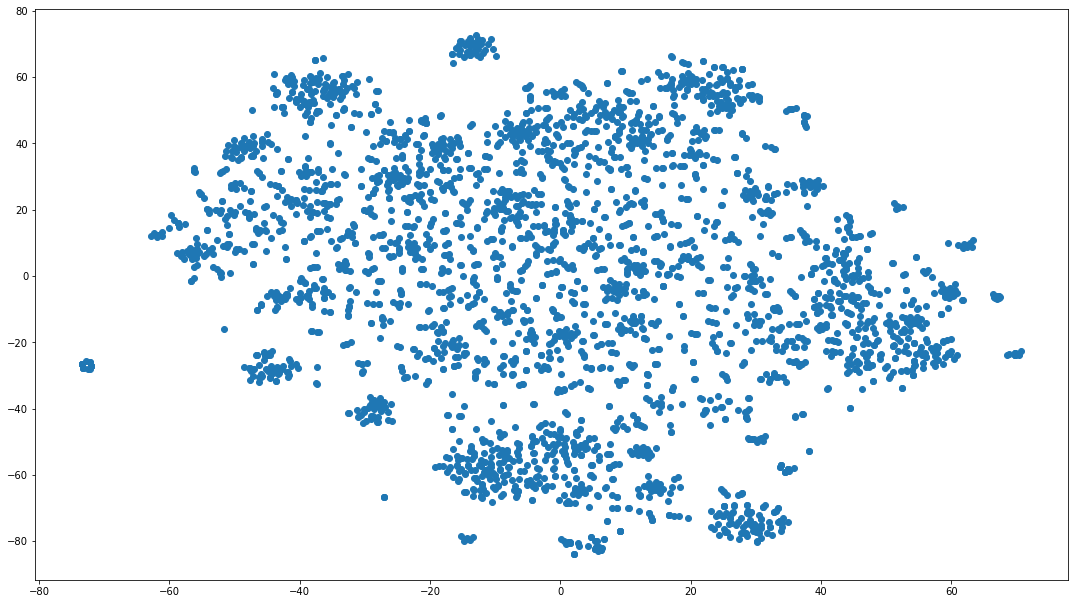

In [18]:
def peek(tsne_results):
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    x, y = [i[0] for i in tsne_results], [i[1] for i in tsne_results]
    ax.scatter(x, y)
    plt.show()

print('reactions')
peek(tsr)
print('enzymes')
peek(tse)

In [20]:
import matplotlib as mpl

def plotLabels(lbl, category, title, tsne_results, save=False):
    if isinstance(lbl, np.ndarray):
        cats = sorted(list(set(lbl.flatten())), reverse=True)
    else:
        cats = sorted(list(set(lbl)), reverse=True)
    if len(cats) < 2:
        print(f"there is only one category: {cats}")
        return

    cats_lookup = {}
    for i, c in enumerate(cats):
        cats_lookup[c] = i

    # https://stackoverflow.com/questions/12487060/matplotlib-color-according-to-class-labels
    N = len(cats)-1

    cmap = plt.cm.rainbow
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

    # define the bins and normalize
    bounds = np.linspace(0,N, N+1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    # colour index labels
    lblc = [cats_lookup[l] for l in lbl]

    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    x, y = [i[0] for i in tsne_results], [i[1] for i in tsne_results]
    scat = ax.scatter(x, y, c = lblc, cmap='rainbow')

    def formatter(val, loc):
        idx = loc
        return cats[idx]
    # create the colorbar
    cb = plt.colorbar(scat, spacing='proportional',ticks=bounds, format=formatter)

    cb.set_label(category)
    ax.set_title(f'{title} (Jaccard)')
    for i, ci in enumerate(lblc):
        if "Cyanobacteria" == cats[ci]:
            ax.annotate(".", (x[i], y[i]))
        elif "yuhuli" in cats[ci]:
            ax.annotate("ab48", (x[i], y[i]))
    if save: plt.savefig(f'figures/{title.replace(" ", "_")}')
    plt.show()

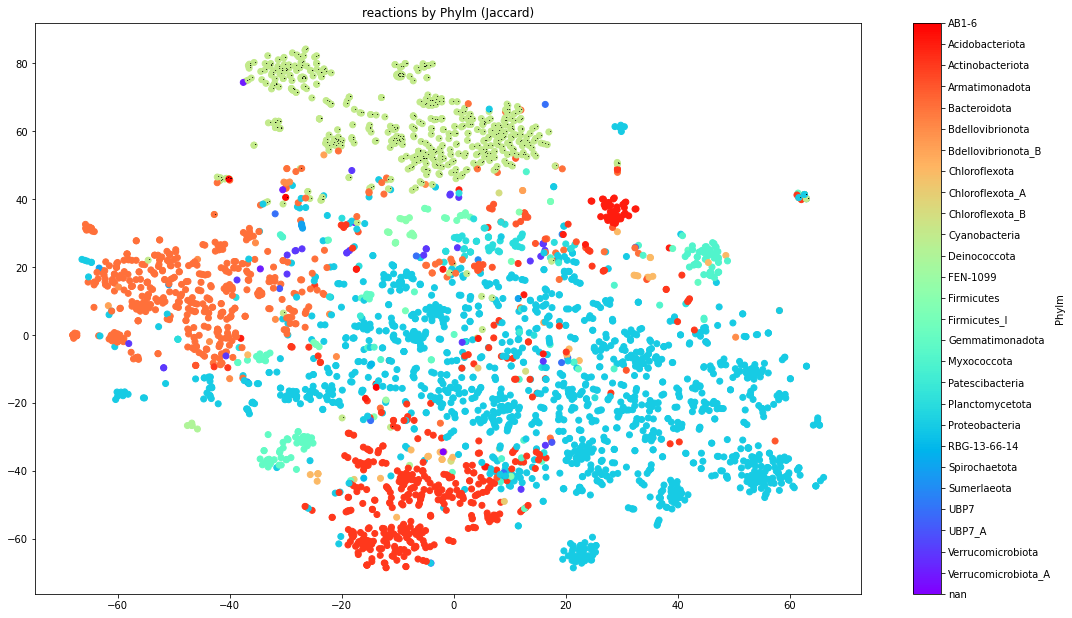

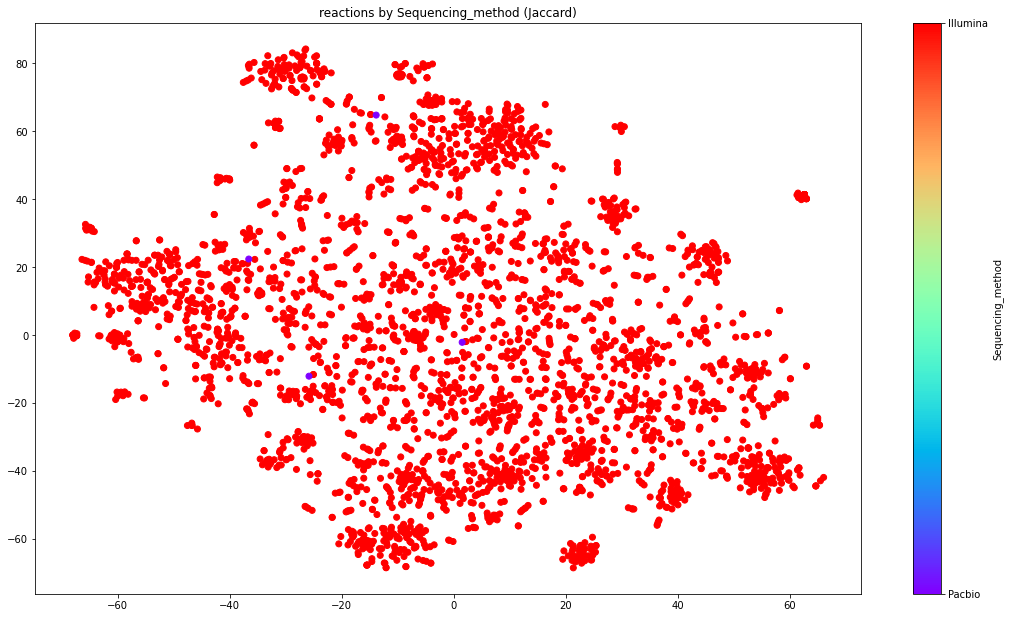

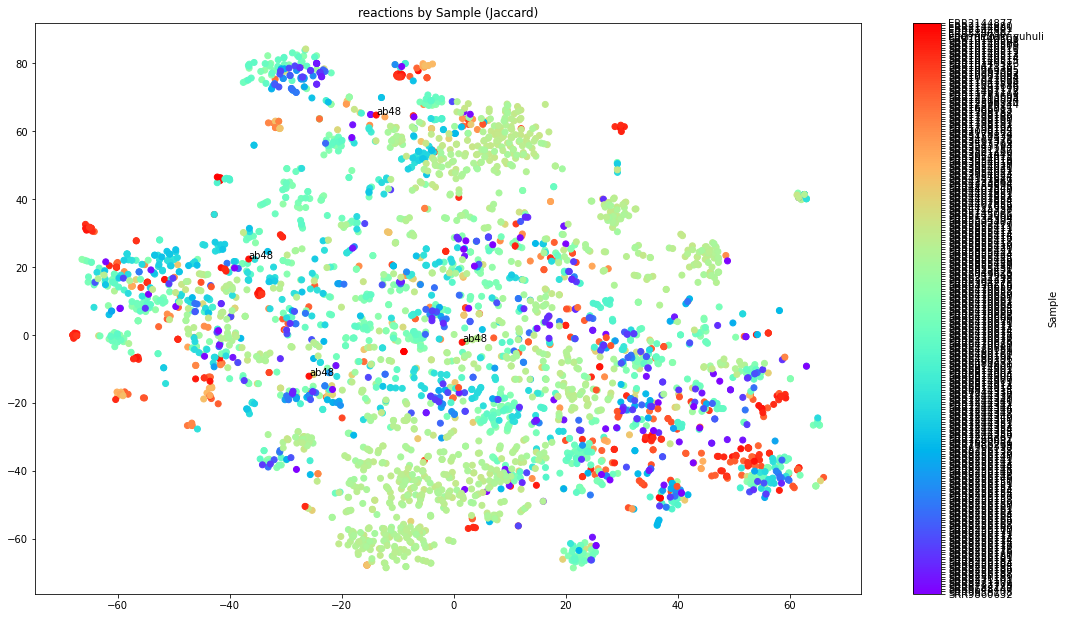

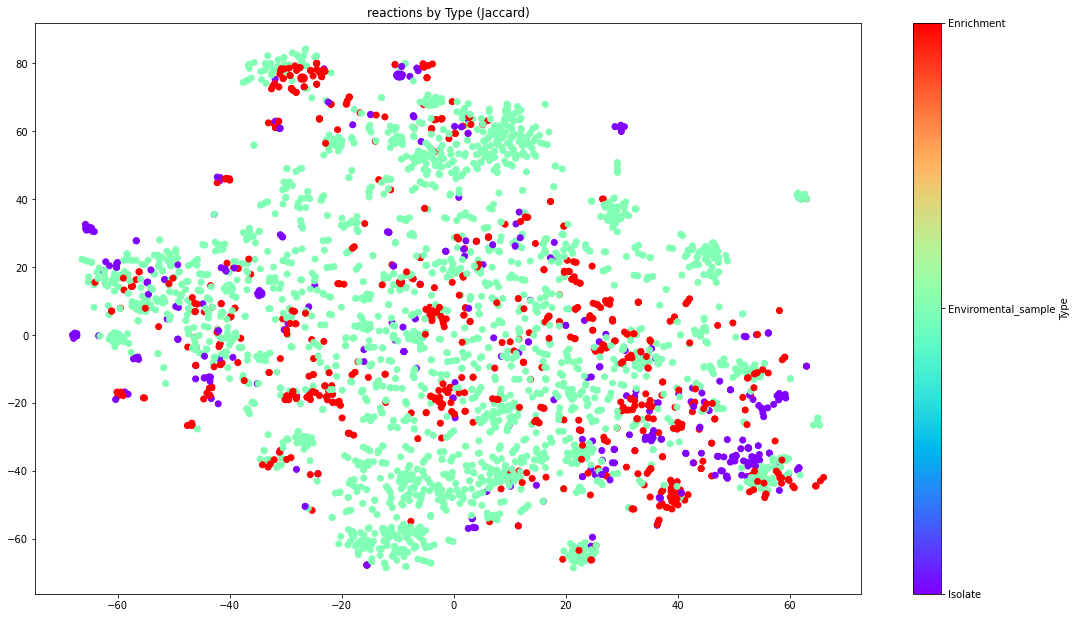

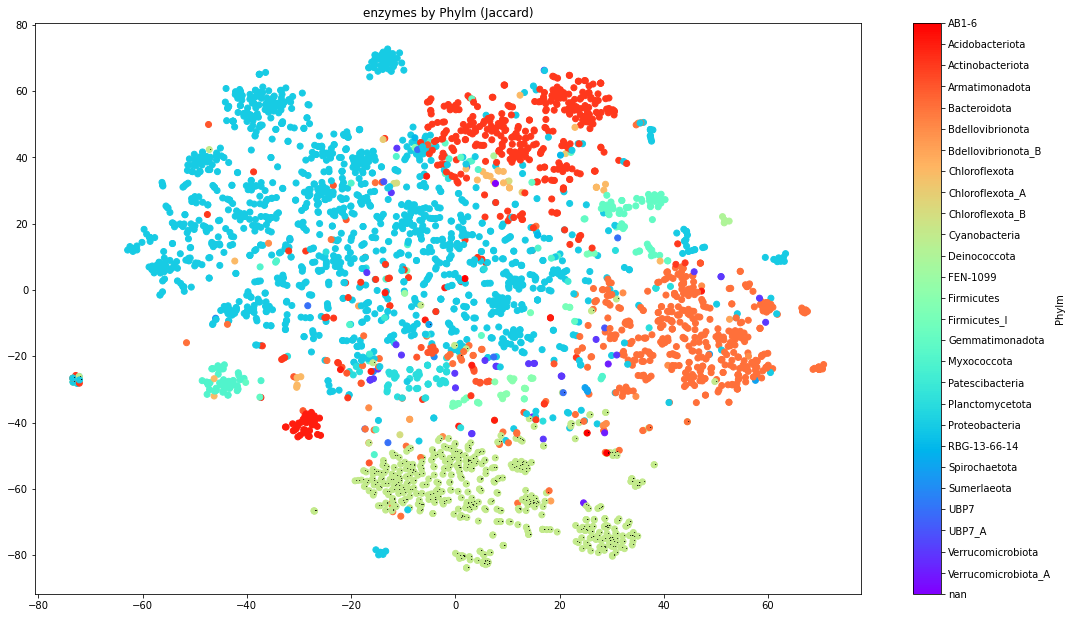

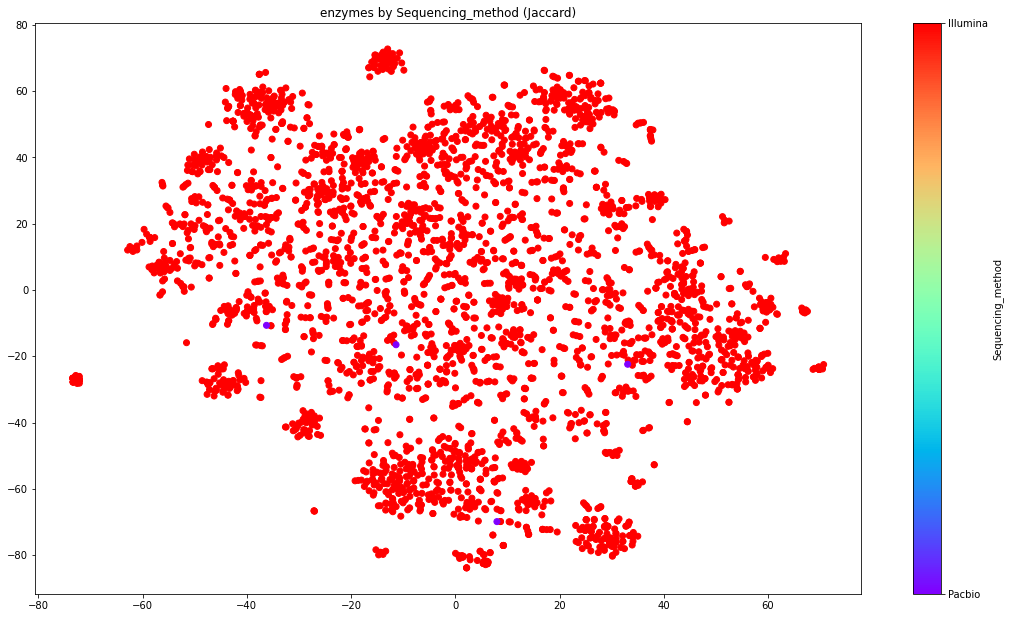

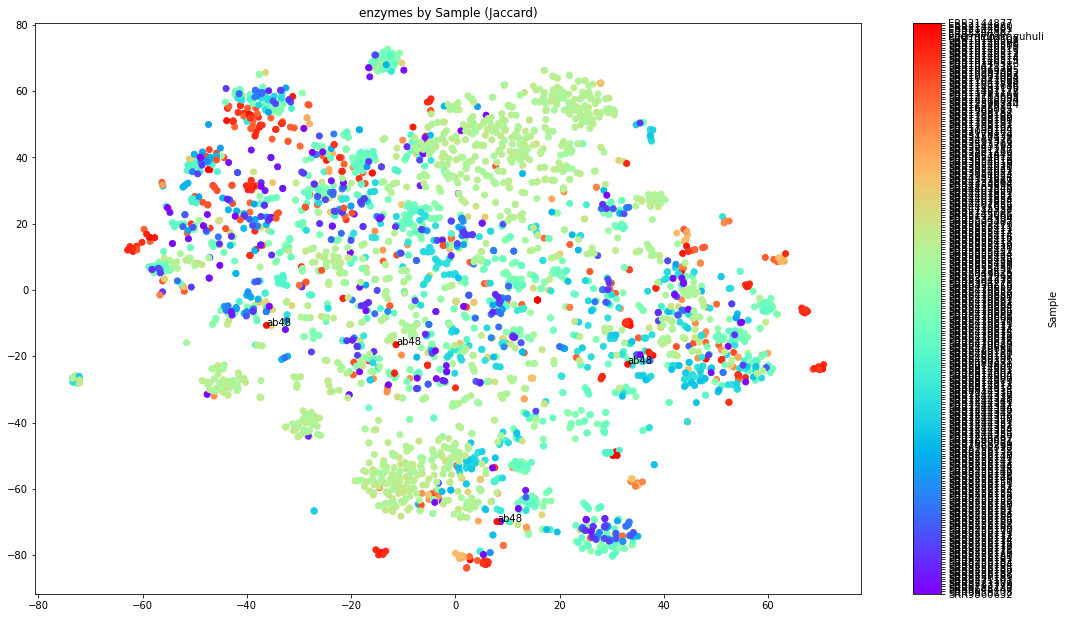

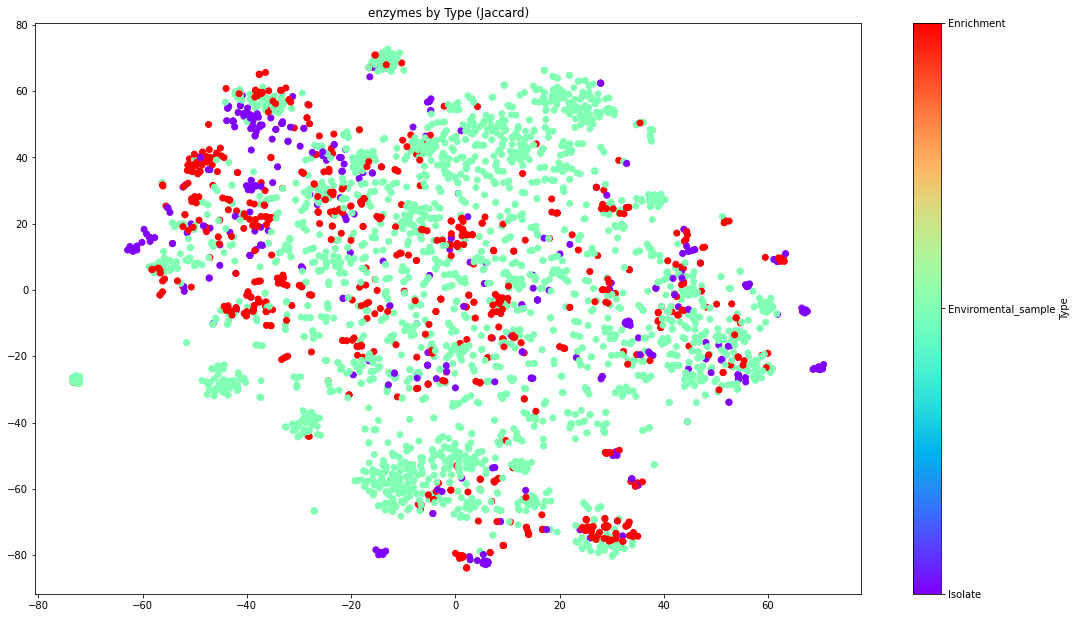

In [21]:
for title, tsne_results in zip(['reactions', 'enzymes'], [tsr, tse]):
    for col, cat in [
        ("Phylm","Phylm"),
        ("Sequencing_method_y", "Sequencing_method"),
        ("Sample_ID_x", "Sample"),
        ("Manually_check_y", "Type"),
    ]:
        lbl = dfs[title][col].to_numpy(dtype=str)
        plotLabels(lbl, cat, f'{title} by {cat}', tsne_results, save=False)


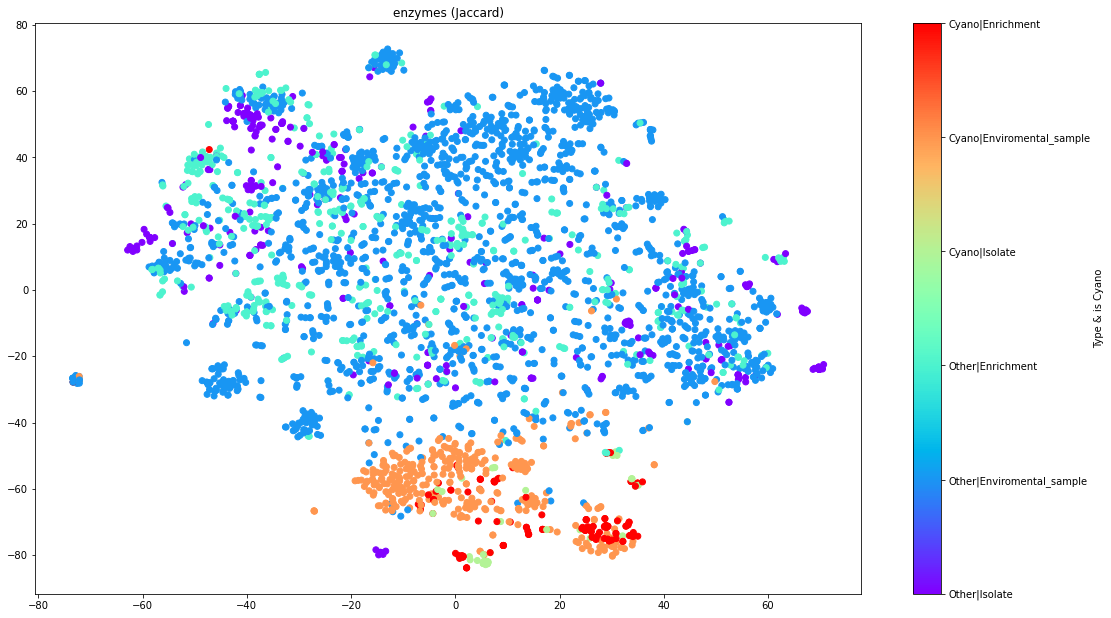

In [23]:
type_cy = []
for i, row in dfs["enzymes"].iterrows():
    cy = row['Phylm'] == 'Cyanobacteria'
    ty = row['Manually_check_y']
    cy = "Cyano" if cy else "Other"
    type_cy.append(f"{cy}|{ty}")

plotLabels(type_cy, f"Type & is Cyano", 'enzymes', tse, save=False)

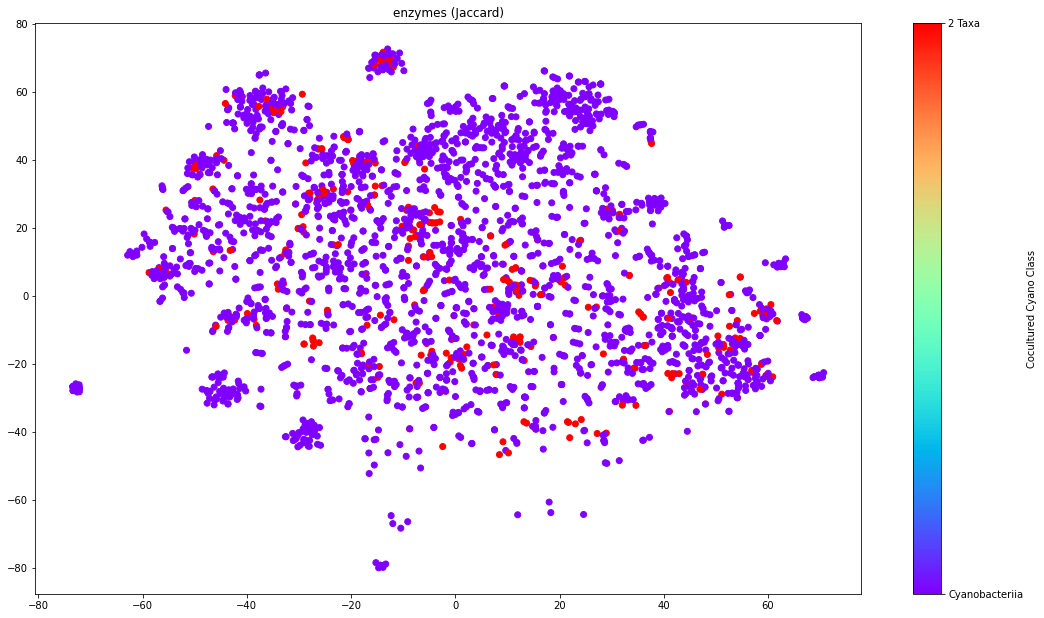

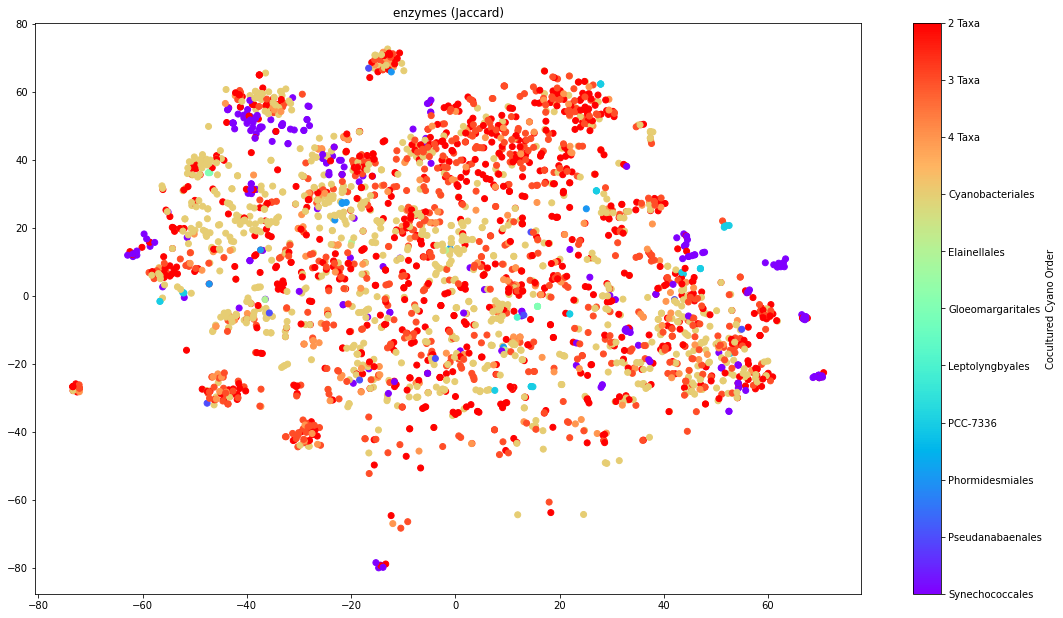

In [26]:

def label_coculture(save=False):
    taxdata = {}
    
    df = dfs["enzymes"]
    order, tclass = set(), set()
    for i, row in df[df["Phylm"]=="Cyanobacteria"].iterrows():
        o, c = row['Order'], row['Class']
        order.add(o)
        tclass.add(c)

    def addoc(sid, o, c):
        nonlocal taxdata
        ors, cs = taxdata[sid] if sid in taxdata else (set(), set())
        ors.add(o)
        cs.add(c)
        taxdata[sid] = ors, cs

    for i, row in df[df["Phylm"]=="Cyanobacteria"].iterrows():
        sid = row['Sample_ID_x']
        addoc(sid, row['Order'], row['Class'])

    def getoc(sid):
        return taxdata[sid]

    cocytax = []
    tsne_nocy = []
    for i, row in df.iterrows():
        if row['Phylm'] == "Cyanobacteria": continue
        
        sid = row['Sample_ID_x']
        cocytax.append(taxdata[sid])
        tsne_nocy.append(tsne_results[i])

    def lab(l):
        if len(l) == 1:
            return list(l)[0]
        else:
            return f"{len(l)} Taxa"

    plotLabels([lab(c) for o, c in cocytax], "Cocultured Cyano Class", 'enzymes',
        tsne_nocy, save=save)
    plotLabels([lab(o) for o, c in cocytax], "Cocultured Cyano Order", 'enzymes',
        tsne_nocy, save=save)

label_coculture(save=False)
